In [3]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
data = pd.read_csv("../../Data/clustering/Data Clustering.csv")
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


Text(0, 0.5, 'Density')

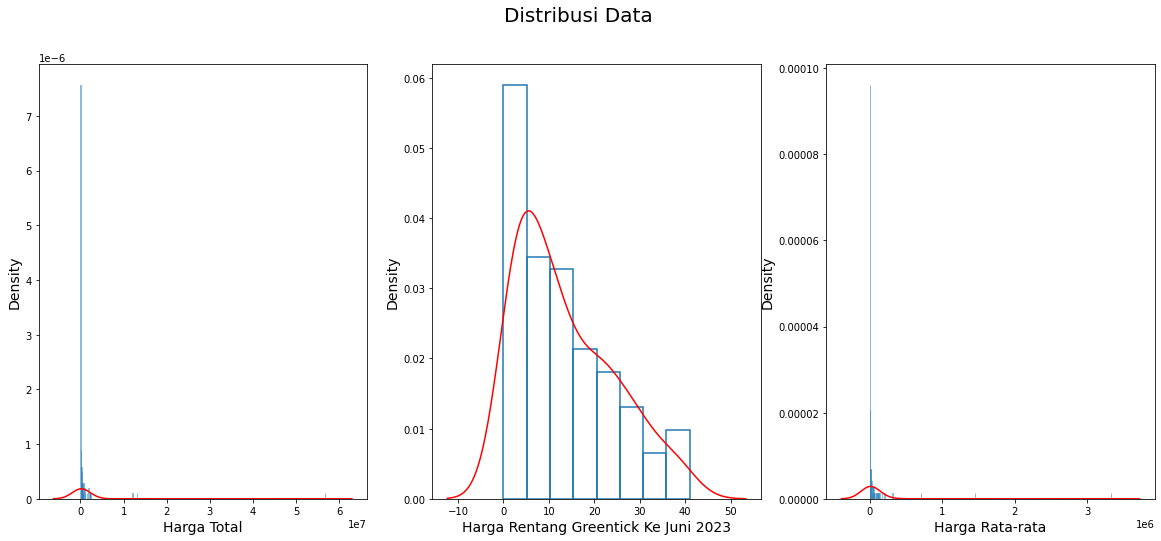

In [5]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

In [6]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR=Q3-Q1

# df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
# dfOutlierBawah=data[((data<(Q1-1.5*IQR))).any(axis=1)]
# dfOutlierAtas=data[((data>(Q3+1.5*IQR))).any(axis=1)]
# df.describe()

In [7]:
from scipy import stats
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']
df = (df[(np.abs(stats.zscore(df[fitur])) < 2).all(axis=1)])
df.shape

(111, 4)

In [8]:
X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

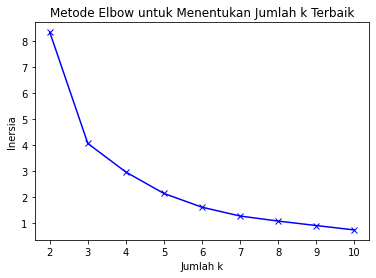

In [9]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [10]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.5445885003337454
CH Index Score = 96.06704820611898

Jumlah Cluster = 3
Silhouette Score = 0.5783197811437858
CH Index Score = 154.8135646760267

Jumlah Cluster = 4
Silhouette Score = 0.5093402795832993
CH Index Score = 153.54704283525246

Jumlah Cluster = 5
Silhouette Score = 0.5206485633920647
CH Index Score = 168.44790115090248

Jumlah Cluster = 6
Silhouette Score = 0.5564389648416528
CH Index Score = 184.36046268860153

Jumlah Cluster = 7
Silhouette Score = 0.5473394032749667
CH Index Score = 197.64175874834893

Jumlah Cluster = 8
Silhouette Score = 0.5507478518822317
CH Index Score = 200.98424019018768

Jumlah Cluster = 9
Silhouette Score = 0.5534048047050266
CH Index Score = 209.81193273816803

Jumlah Cluster = 10
Silhouette Score = 0.49672442577654935
CH Index Score = 230.0807787638529


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.5783197811437858

Jumlah Cluster CH Index 

In [11]:
distance_matrix = pairwise_distances(X, metric='euclidean')

# Perform KMedoids clustering
n_clusters = 4
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
member = kmedoids.fit_predict(X)

df['cluster'] = kmedoids.labels_
df['cluster'].value_counts()

2    43
3    30
1    26
0    12
Name: cluster, dtype: int64

In [12]:
df.groupby('cluster').describe().transpose()

cluster                                        0          1          2  \
Total                          count      12.000     26.000     43.000   
                               mean  1178608.083  66957.154  14640.395   
                               std    803057.734  96932.713  32988.846   
                               min    335288.000     11.000      0.000   
                               25%    438670.500   4638.500     14.000   
                               50%    876644.000  31085.000   1871.000   
                               75%   1917017.250  70965.750  15341.000   
                               max   2350727.000 358145.000 187089.000   
Rentang Greentick Ke Juni 2023 count      12.000     26.000     43.000   
                               mean       12.417     12.038      3.558   
                               std         9.366      2.391      2.185   
                               min         3.000      8.000      0.000   
                               25%         6.500     10.250      1.500   
                               50%         9.500     12.000      4.000   
                               75%        15.250     14.000      5.000   
                               max        32.000     16.000      7.000   
Rata-rata                      count      12.000     26.000     43.000   
                               mean   122412.833   5890.038   2992.186   
                               std     77942.987   9612.699   5567.119   
                               min     43114.000      2.000      0.000   
                               25%     67437.500    397.500      8.500   
                               50%    103537.000   2135.000    312.000   
                               75%    145462.500   5751.250   3595.500   
                               max    315614.000  41254.000  26727.000   

cluster                                        3  
Total                          count      30.000  
                               mean   246942.867  
                               std    364825.881  
                               min         0.000  
                               25%     32513.250  
                               50%    145695.500  
                               75%    275393.500  
                               max   1800386.000  
Rentang Greentick Ke Juni 2023 count      30.000  
                               mean       24.000  
                               std         4.017  
                               min        19.000  
                               25%        20.000  
                               50%        23.500  
                               75%        27.750  
                               max        32.000  
Rata-rata                      count      30.000  
                               mean    14526.533  
                               std     21460.403  
                               min         0.000  
                               25%      1912.750  
                               50%      8571.000  
                               75%     16200.500  
                               max    105906.000

In [13]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_9104\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
0,1178608.083,12.417,122412.833
3,246942.867,24.000,14526.533
1,66957.154,12.038,5890.038
2,14640.395,3.558,2992.186


In [14]:
df['cluster'].value_counts()

2    43
3    30
1    26
0    12
Name: cluster, dtype: int64

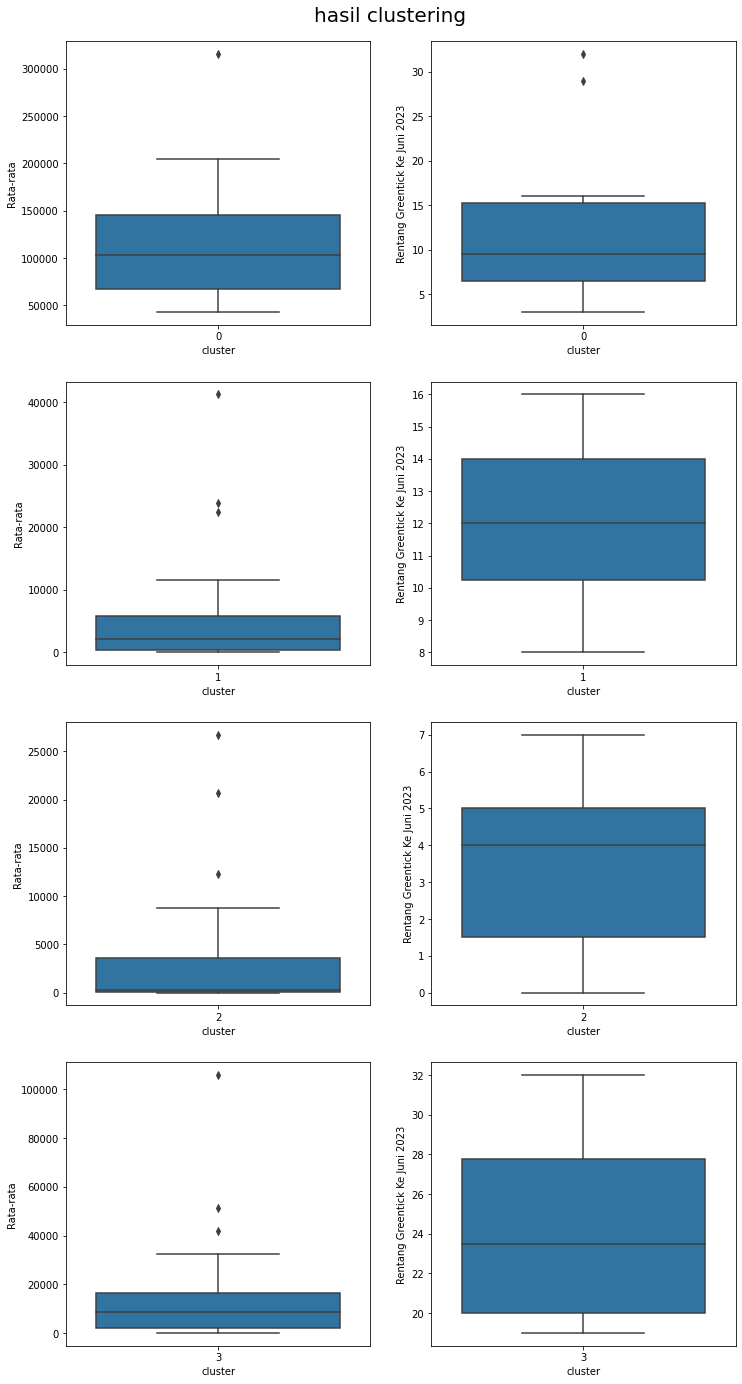

In [15]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(n_clusters, 2, figsize=(12, n_clusters*6))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(n_clusters):
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [16]:
df[df['cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,1
11,Customer 11,72754,14,5197,1
18,Customer 18,248,8,31,1
19,Customer 19,55956,12,4663,1
25,Customer 25,7089,12,591,1
26,Customer 26,1499,12,125,1
28,Customer 28,1555,11,142,1
37,Customer 37,71222,12,5936,1
39,Customer 39,18251,10,1826,1
44,Customer 44,279,10,28,1


In [17]:
df[df['cluster'] == 2]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,2
2,Customer 2,17148,4,4287,2
4,Customer 4,10,0,10,2
5,Customer 5,82788,4,20697,2
6,Customer 6,61563,5,12313,2
7,Customer 7,541,6,91,2
10,Customer 10,6,4,2,2
12,Customer 12,25989,7,3713,2
17,Customer 17,61245,7,8750,2
20,Customer 20,189,2,95,2


# Pembatas

In [18]:
distance_matrix = pairwise_distances(X, metric='euclidean')

# Perform KMedoids clustering
n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, method='pam', init='k-medoids++')
member = kmedoids.fit_predict(X)

df['cluster'] = kmedoids.labels_
df['cluster'].value_counts()

1    48
3    25
4    18
0    14
2     6
Name: cluster, dtype: int64

In [19]:
df.groupby('cluster').describe().transpose()

cluster                                       0          1           2  \
Total                          count     14.000     48.000       6.000   
                               mean  190126.143  37586.250 1995790.833   
                               std   271801.452  98333.992  301738.755   
                               min        2.000      0.000 1578066.000   
                               25%    29185.500     16.250 1809574.250   
                               50%    85540.000   2041.500 1996895.500   
                               75%   161327.500  18029.000 2227994.250   
                               max   869292.000 457813.000 2350727.000   
Rentang Greentick Ke Juni 2023 count     14.000     48.000       6.000   
                               mean      27.286      3.812      19.500   
                               std        2.758      2.303      11.760   
                               min       24.000      0.000       5.000   
                               25%       25.000      2.000      11.000   
                               50%       27.500      4.000      20.000   
                               75%       28.750      6.000      29.000   
                               max       32.000      8.000      32.000   
Rata-rata                      count     14.000     48.000       6.000   
                               mean   11184.286   8357.771  176396.833   
                               std    15988.229  22684.867   76349.942   
                               min        0.000      0.000  105906.000   
                               25%     1717.500      8.750  129716.250   
                               50%     5032.500    330.000  152646.000   
                               75%     9490.000   4612.750  195283.500   
                               max    51135.000 111763.000  315614.000   

cluster                                       3           4  
Total                          count     25.000      18.000  
                               mean   96951.520  280975.944  
                               std   157074.106  273080.059  
                               min      279.000       0.000  
                               25%     7089.000   80901.500  
                               50%    39103.000  222563.000  
                               75%    72754.000  384322.250  
                               max   696394.000 1021730.000  
Rentang Greentick Ke Juni 2023 count     25.000      18.000  
                               mean      11.920      19.722  
                               std        2.361       2.296  
                               min        8.000      15.000  
                               25%       10.000      20.000  
                               50%       12.000      20.000  
                               75%       14.000      20.750  
                               max       16.000      23.000  
Rata-rata                      count     25.000      18.000  
                               mean   10375.800   17279.222  
                               std    19776.968   17693.979  
                               min       28.000       0.000  
                               25%      591.000    4759.250  
                               50%     2779.000   13092.500  
                               75%     6382.000   23688.000  
                               max    87050.000   68116.000

In [20]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_9104\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,1995790.833,19.500,176396.833
4,280975.944,19.722,17279.222
0,190126.143,27.286,11184.286
3,96951.520,11.920,10375.800
1,37586.250,3.812,8357.771


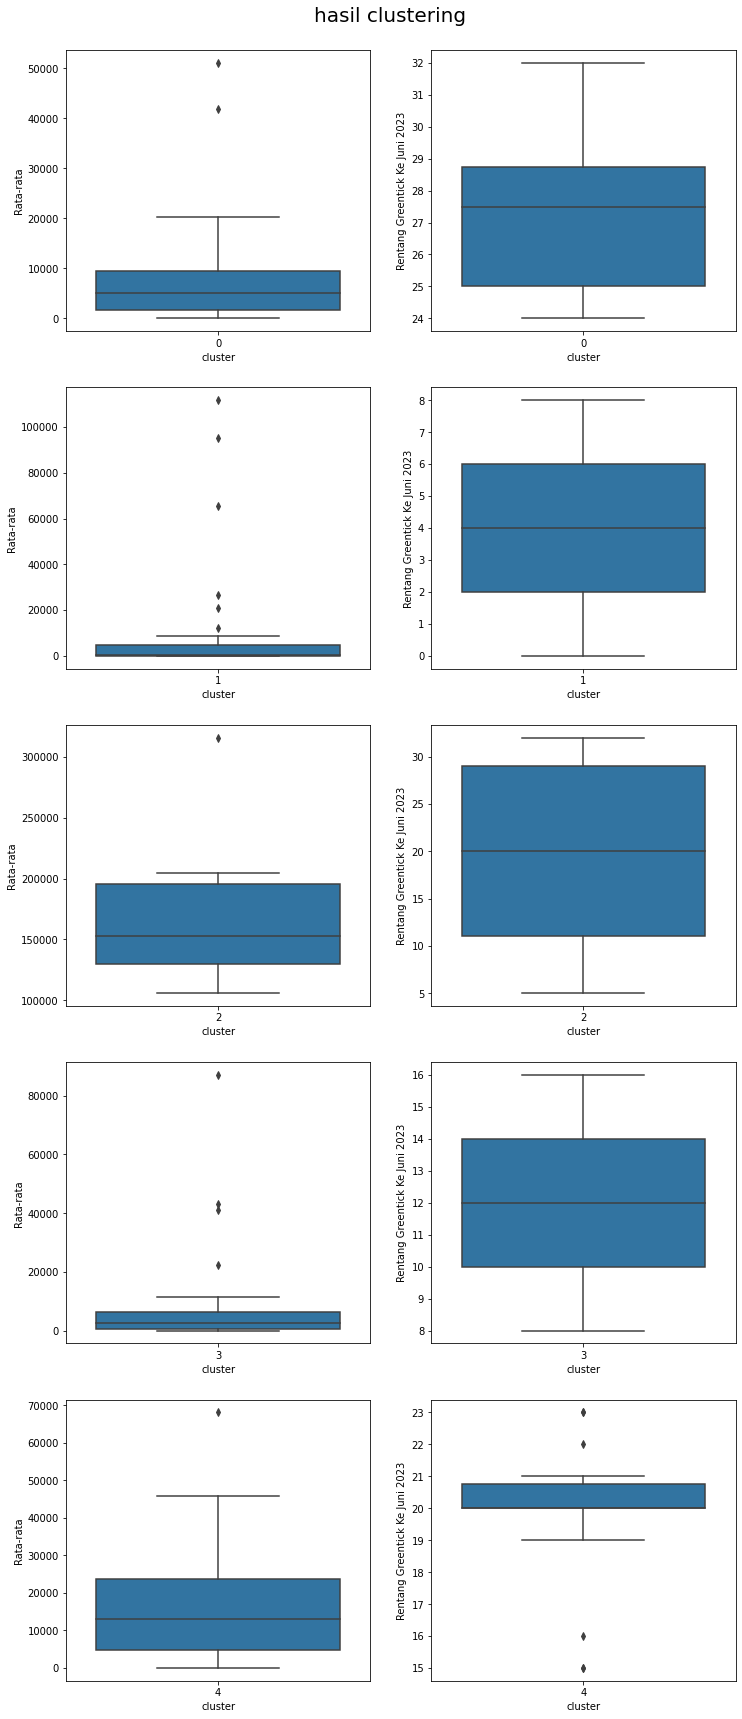

In [21]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(n_clusters, 2, figsize=(12, n_clusters*6))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(n_clusters):
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [22]:
df[df['cluster'] == 3]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
0,Customer 0,134921,12,11244,3
11,Customer 11,72754,14,5197,3
19,Customer 19,55956,12,4663,3
25,Customer 25,7089,12,591,3
26,Customer 26,1499,12,125,3
28,Customer 28,1555,11,142,3
37,Customer 37,71222,12,5936,3
39,Customer 39,18251,10,1826,3
44,Customer 44,279,10,28,3
45,Customer 45,330029,8,41254,3
